In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import psycopg2
import json

In [3]:
dbconf = None
with open('/Users/atfienberg/g-2/sipmometer/config/dbconnection.json', 'r') as f:
    dbconf = json.load(f)

In [4]:
cnx = psycopg2.connect(user=dbconf['user'], password=dbconf['password'],
                                  host=dbconf['host'],
                                  database=dbconf['dbname'], port=dbconf['port'])
cursor=cnx.cursor()
cursor.execute("select value, time from g2sc_values where channel='calo21temps' order by time")
sipmnames = ['SiPM{}'.format(i) for i in range(54)] 
times = []
temps = []
for (temprow, time) in cursor:
    temps.append(temprow)
    times.append(time)
    
cursor.close()
cnx.close()

# build pandas dataframe
tempframe = pd.DataFrame(temps, columns=sipmnames, index=times)
# mask out failed reads
tempframe = tempframe[(tempframe > 20) & (tempframe < 50)]
tempframe

,SiPM0,SiPM1,SiPM2,SiPM3,SiPM4,SiPM5,SiPM6,SiPM7,SiPM8,SiPM9,...,SiPM44,SiPM45,SiPM46,SiPM47,SiPM48,SiPM49,SiPM50,SiPM51,SiPM52,SiPM53
2017-02-09 10:19:45.674560,NaN,31.0000,30.4375,31.2500,31.1875,32.1250,33.4375,34.2500,33.3750,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0625,33.5625,32.3125
2017-02-09 10:20:00.653777,NaN,31.0000,30.3750,31.2500,31.1875,32.1250,33.5000,34.3125,33.3125,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0000,33.5625,32.3125
2017-02-09 10:20:15.702132,NaN,30.9375,30.3750,31.2500,31.1875,32.1250,33.5000,34.2500,33.3125,NaN,...,35.8750,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0625,33.5625,32.3750
2017-02-09 10:20:30.651569,NaN,30.9375,30.3750,31.2500,31.1875,32.1250,33.5000,34.3125,33.3125,NaN,...,35.8750,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0000,33.5625,32.3125
2017-02-09 10:20:45.761293,NaN,31.0000,30.4375,31.2500,31.1875,32.1250,33.5000,34.3125,33.3125,NaN,...,35.9375,NaN,28.8750,30.0000,30.8125,32.0000,32.5625,33.0625,33.5625,32.3125
2017-02-09 10:21:00.895790,NaN,30.9375,30.3750,31.2500,31.1875,32.1250,33.5000,34.3125,33.3750,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0625,33.5000,32.3125
2017-02-09 10:21:15.925949,NaN,30.9375,30.4375,31.2500,31.1875,32.1250,33.4375,34.2500,33.3125,NaN,...,35.8750,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0000,33.5625,32.3125
2017-02-09 10:21:31.046847,NaN,30.9375,30.3750,31.2500,31.1875,32.1250,33.5000,34.2500,33.3750,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0000,33.5000,32.3125
2017-02-09 10:21:46.115179,NaN,31.0000,30.3750,31.2500,31.1875,32.1250,33.5000,34.3125,33.3125,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0000,33.5625,32.3750
2017-02-09 10:22:01.107481,NaN,31.0000,30.4375,31.2500,31.1875,32.1250,33.5000,34.2500,33.3125,NaN,...,35.9375,NaN,28.8125,30.0000,30.8125,32.0000,32.5000,33.0625,33.5625,32.3750


<IPython.core.display.Javascript object>


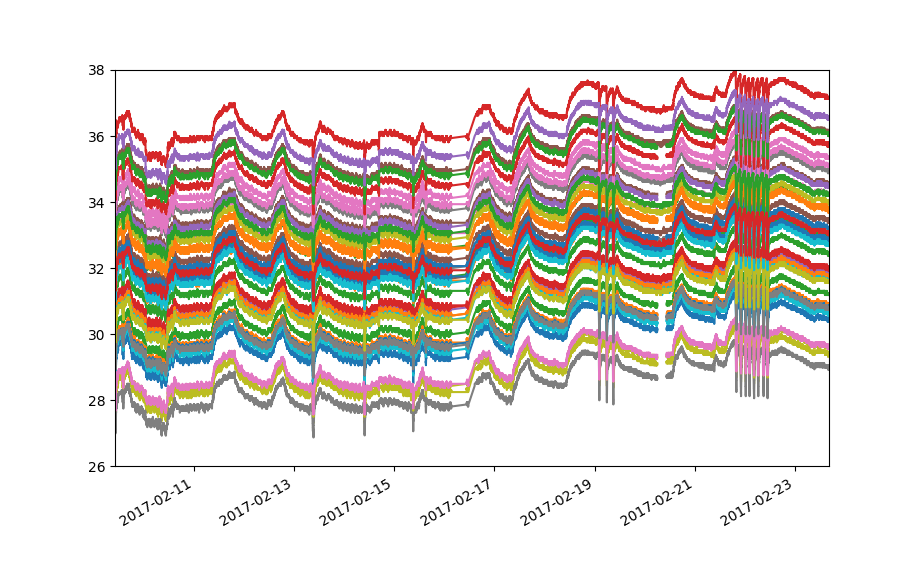

In [5]:
tempframe.plot(legend=False)
lims=plt.ylim(26,38)

<IPython.core.display.Javascript object>


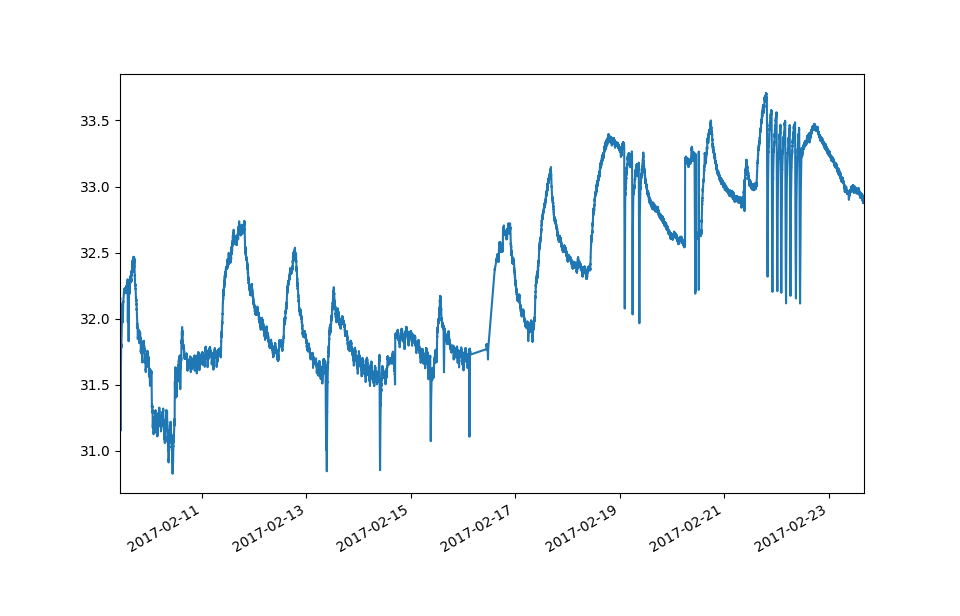

In [6]:
mean = tempframe.mean(1).plot()

<IPython.core.display.Javascript object>


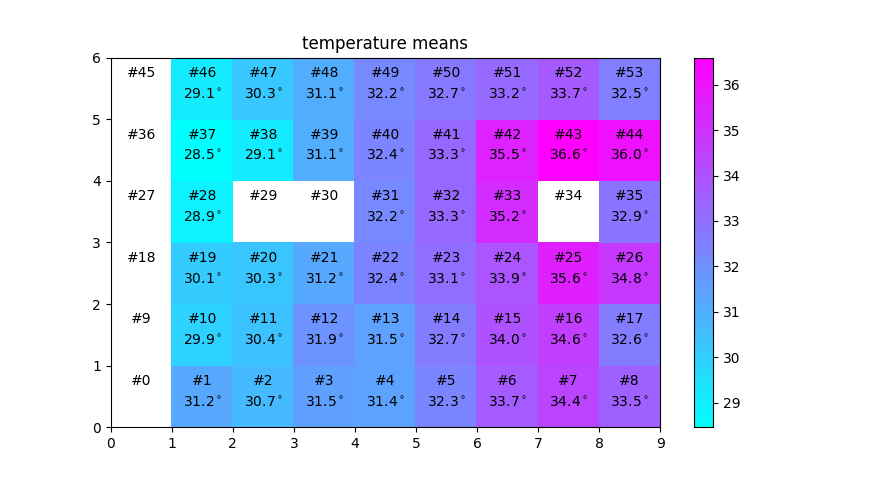

In [8]:
griddata = np.reshape(tempframe.mean().as_matrix(), (6,9))
griddata = np.ma.masked_invalid(griddata)
heatmap = plt.pcolor(griddata, cmap='cool')
plt.colorbar(heatmap)
for y in range(griddata.shape[0]):
    for x in range(griddata.shape[1]):
        val = griddata[y,x]          
        plt.text(x+0.5, y+0.75, '#{}'.format(y*9+x), horizontalalignment='center', verticalalignment='center')
        if val > 0.1:
            plt.text(x+0.5, y+0.4, '{:.1f}$^\circ$'.format(val), horizontalalignment='center', verticalalignment='center')
title=plt.title('temperature means')

<IPython.core.display.Javascript object>


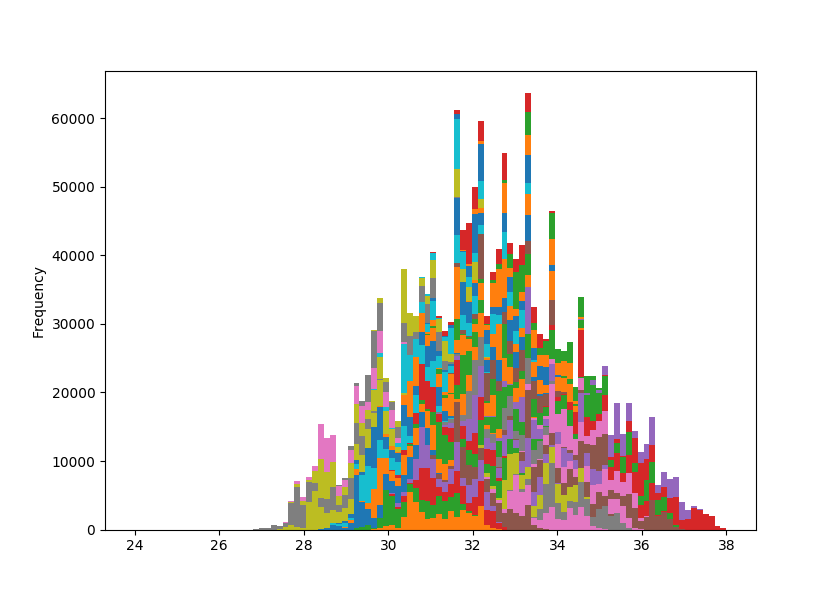

In [9]:
hists = tempframe.plot.hist(stacked=True, legend=False, bins=100)

<IPython.core.display.Javascript object>


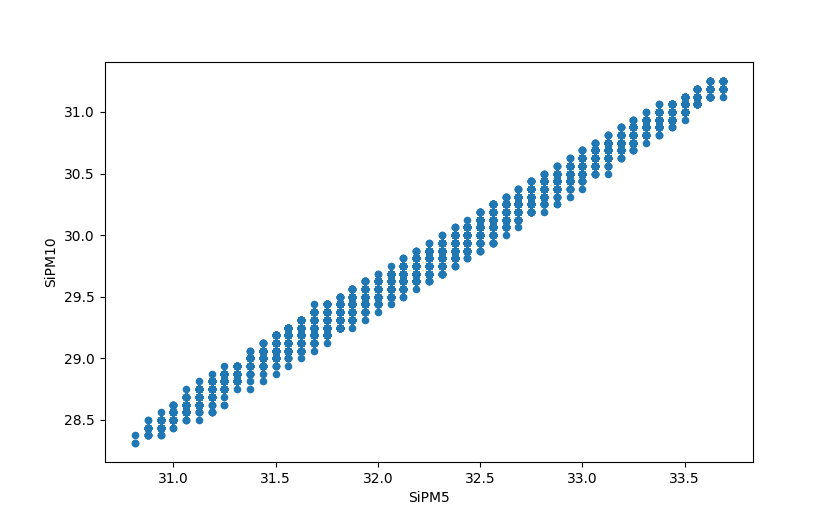

In [10]:
scatter = tempframe.plot.scatter(x='SiPM5', y='SiPM10')

<IPython.core.display.Javascript object>


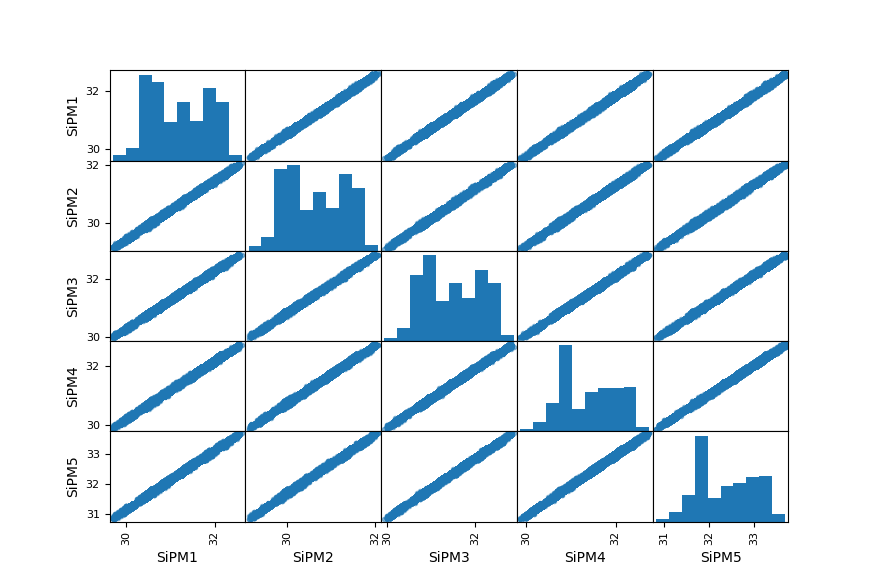

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_plots = scatter_matrix(tempframe.iloc[:,1:6])